<h3>Ludovic Aubert-Cramoisy<br>
François Boniface</h3>
<br><br>
<center><h1>SD210 : TP2 - Arbres de décision et forêts aléatoires</h1></center>
<br>
<h3>Initialisation</h3>

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from utils import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<center><h2>Arbres de décision</h2></center><h3>Question 1</h3>
Dans le cadre de la régression, on peut choisir la variance comme mesure d'impureté.
$$ H(R) = var(R) = \frac{1}{\#R} \sum_{r \in R} (r - \bar{r}) $$
où $$ \bar{r} = \frac{1}{\#R} \sum_{r \in R} r $$

Ce choix s'explique par le fait qu'on cherche à maximiser l’homogénéité/pureté des sorties, ce qui dans ce cas revient à trouver la partition minimisant le risque quadratique.

<h3>Question 2</h3>

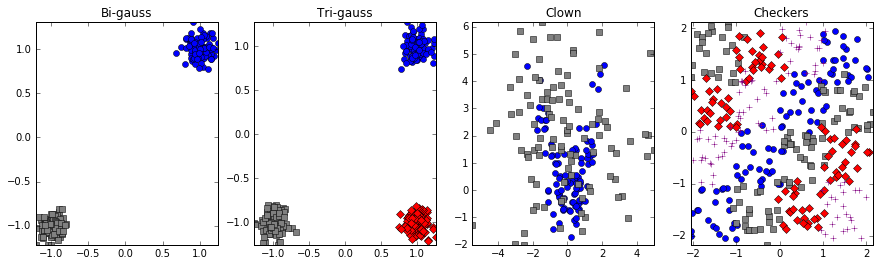

In [50]:
bi_gauss = utils.rand_bi_gauss()
tri_gauss = utils.rand_tri_gauss()
clown = utils.rand_clown()
checkers = utils.rand_checkers()

plt.figure(1,figsize=(15,4))
plt.subplot(141)
plot_2d(bi_gauss[:,0:2],bi_gauss[:,2],alpha_choice=0.7)
plt.title('Bi-gauss')

plt.subplot(142)
plot_2d(tri_gauss[:,0:2],tri_gauss[:,2],alpha_choice=0.7)
plt.title('Tri-gauss')

plt.subplot(143)
plot_2d(clown[:,0:2],clown[:,2],alpha_choice=0.7)
plt.title('Clown')

plt.subplot(144)
plot_2d(checkers[:,0:2],checkers[:,2],alpha_choice=0.7)
plt.title('Checkers')

plt.show()

<h3>Question 3</h3>

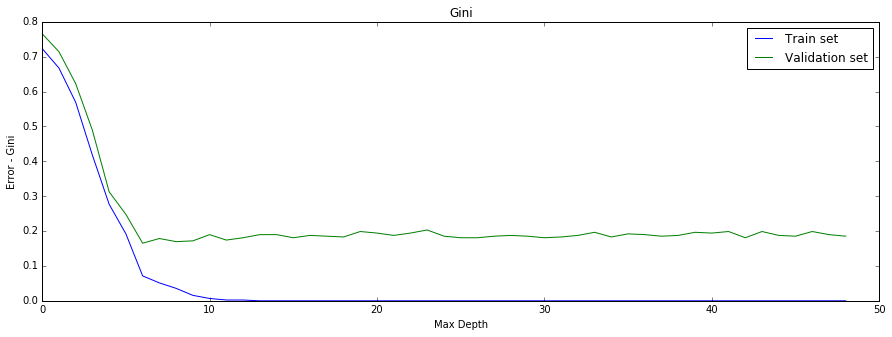

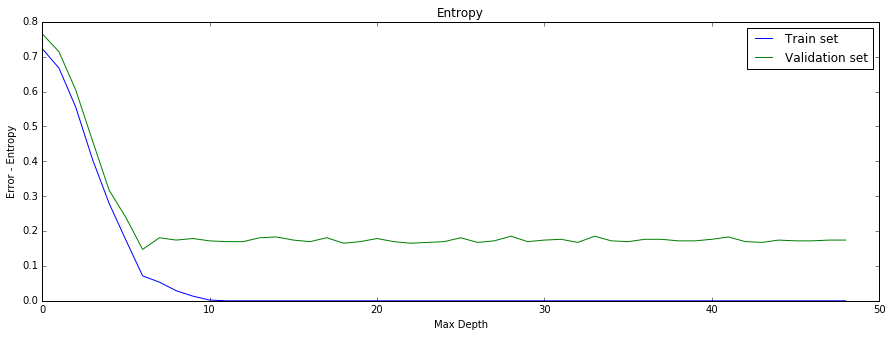

In [51]:
from sklearn import tree

n = 448
# on fait attention à équilibrer les classes : 448/4 = 112
train_set = rand_checkers(n1 = n/4, n2 = n/4, n3=n/4, n4=n/4, sigma = 0.1)
validation_set = rand_checkers(n1 = n/4, n2 = n/4, n3=n/4, n4=n/4, sigma = 0.1)

maxDepth = 50
for criterion in ['Gini', 'Entropy']:
    scoreTrain = []
    scoreValidation = []

    for k in range(1, maxDepth):
        clf = tree.DecisionTreeClassifier(criterion=criterion.lower(), max_depth=k)
        clf.fit(train_set[:, 0:2], train_set[:,2])
        scoreTrain.append(clf.score(train_set[:, 0:2], train_set[:, 2]))
        scoreValidation.append(clf.score(validation_set[:, 0:2], validation_set[:, 2]))

    # on plotte le pourcentage d'erreurs (non le score)
    plt.figure(figsize=(15, 5))
    #plt.plot(map(lambda x: 1-x, scoreTrain), label='Train set')
    plt.plot([1-x for x in scoreTrain], label='Train set')
    #plt.plot(map(lambda x: 1-x, scoreValidation), label='Validation set')
    plt.plot([1-x for x in scoreValidation], label='Validation set')
    plt.legend()
    plt.ylabel('Error - ' + criterion)
    plt.xlabel('Max Depth')
    plt.title(criterion)


<h3>Question 4</h3><br>
On utilise la profondeur qui minimise l’erreur de validation obtenue avec l’entropie
et donc qui maximise le score
ici on soupçonne une coquille dans l'énoncé (minimiser l'erreur de validation et non de test).

In [52]:
# ici scoreValidation correspond bien à l'entropie (calculé en 2ème précédemment)
depth = np.argmax(scoreValidation) + 1 # + 1 car notre boucle précédente de maxDepth allait commençait à 1 (non 0)
#print "Profondeur optimale pour l'ensemble de validation : ", depth
print("Profondeur optimale pour l'ensemble de validation : ", depth)

Profondeur optimale pour l'ensemble de validation :  7


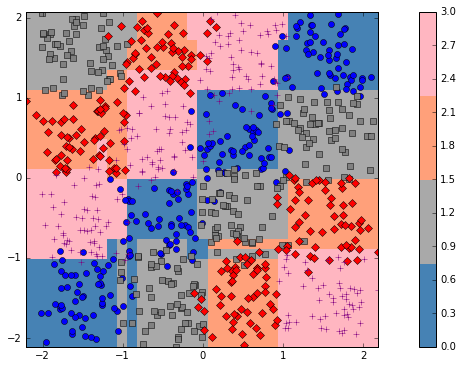

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
clf.fit(train_set[:, 0:2], train_set[:,2])

# on regroupe le set train et de validation 
# en fait, on pouvait initialement créer ce jeu de données en premier puis le splitter en 2)
data = np.vstack((train_set, validation_set))
plt.figure(figsize=(15, 6))
plot_2d(data[:,0:2], data[:,2])
frontiere(clf.predict, data[:,0:2])

<h3>Question 5</h3>

In [54]:
import os
f = tree.export_graphviz(clf, out_file="my_tree.dot") # clf: tree classifier
os.system("dot -Tpdf my_tree.dot -o my_tree.pdf")
os.system("evince my_tree.pdf")

1

<h3>Question 6</h3>

In [55]:
n = 192
# 192 / 4 = 48
test_set = rand_checkers(n1=n/4, n2=n/4, n3=n/4, n4=n/4)
#print 'Test error ' + str(1 - clf.score(test_set[:,0:2], test_set[:,2]))
#print 'Train error ' + str(1 - clf.score(train_set[:,0:2], train_set[:,2]))
#print 'Validation error ' + str(1 - clf.score(validation_set[:,0:2], validation_set[:,2]))

print ('Train error : ', str(1 - clf.score(train_set[:,0:2], train_set[:,2])))
print ('Validation error : ', str(1 - clf.score(validation_set[:,0:2], validation_set[:,2])))
print ('Test error : ', str(1 - clf.score(test_set[:,0:2], test_set[:,2])))

Train error :  0.0714285714286
Validation error :  0.151785714286
Test error :  0.161458333333


L'utilité des 3 set :
- On utilise le training set pour faire l'apprentissage du modèle (ici decision tree) en faisant varier l'hyperparamètre (max_depth de l'arbre), et ensuite, une fois l'hyperparamètre déterminé on l'utilise avec celui-ci.
- On se sert du set de validation pour déterminer l'hyperparamètre => on choisit l'hyperparamètre qui minimise l'erreur de validation
- On se sert du test set pour estimer les performances de notre classifieur (ce sont donc des données nouvelles pour lui car il n'a pas appris avec, et on n'a pas déterminé l'hyperparamètre avec)


<h3>Question 7</h3>

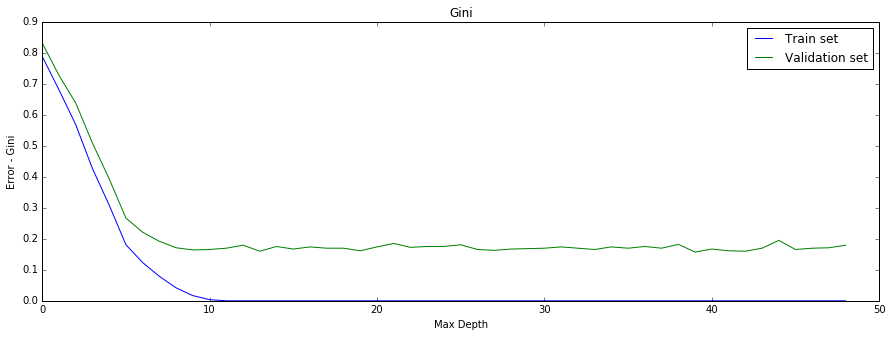

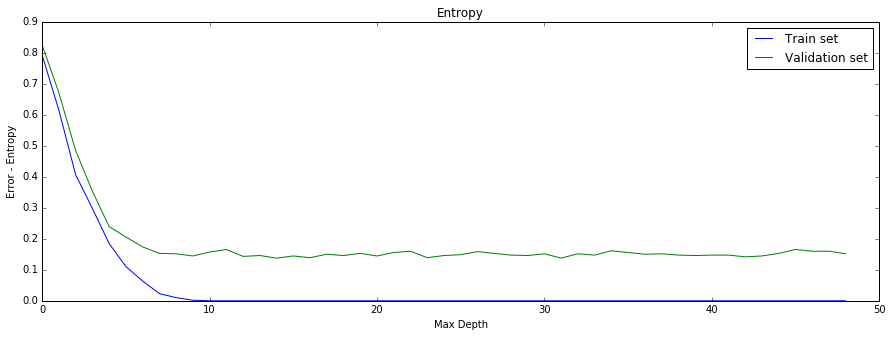

In [56]:
from sklearn import datasets
from sklearn import cross_validation

digits = datasets.load_digits()
X = digits.data
y = digits.target

# on choisit pour la taille de l'ensemble de validation 40% de la taille initial
train_set, validation_set, y_train, y_validation = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
m = len(train_set[0])

train_set = np.hstack((train_set, y_train.reshape(y_train.shape[0],1)))
validation_set = np.hstack((validation_set, y_validation.reshape(y_validation.shape[0],1)))

scoreTrain = []
scoreValidation = []
maxDepth = 50
for criterion in ['Gini', 'Entropy']:
    scoreTrain = []
    scoreValidation = []

    for k in range(1, maxDepth):
        clf = tree.DecisionTreeClassifier(criterion=criterion.lower(), max_depth=k)
        clf.fit(train_set[:, 0:m], train_set[:,m])
        scoreTrain.append(clf.score(train_set[:, 0:m], train_set[:, m]))
        scoreValidation.append(clf.score(validation_set[:, 0:m], validation_set[:, m]))

    # on plotte le pourcentage d'erreurs (non le score)
    plt.figure(figsize=(15, 5))
    #plt.plot(map(lambda x: 1-x, scoreTrain), label='Train set')
    plt.plot([1-x for x in scoreTrain], label='Train set')
    #plt.plot(map(lambda x: 1-x, scoreValidation), label='Validation set')
    plt.plot([1-x for x in scoreValidation], label='Validation set')
    plt.legend()
    plt.ylabel('Error - ' + criterion)
    plt.xlabel('Max Depth')
    plt.title(criterion)

<center><h2>Agrégation de modèles</h2></center>
<h3>Question 8</h3>

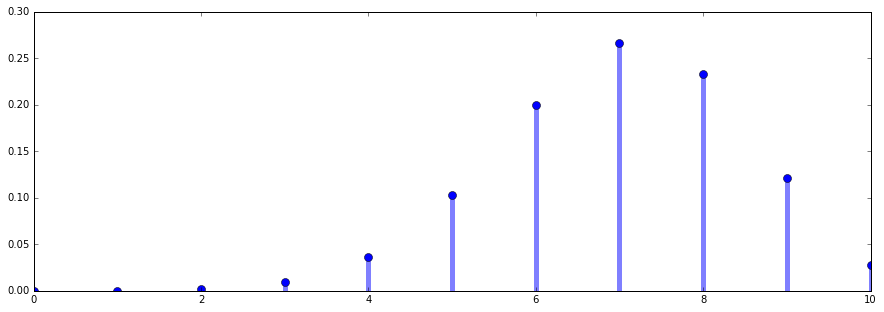

In [58]:
from scipy.stats import binom

m, p = 10, 0.7 # Binomial parameters
x = np.arange(0,m+1) # Possible outputs
pmf = binom.pmf(x, m, p) # Probability mass function  binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
plt.figure(figsize=(15, 5))
plt.plot(x, pmf, 'bo', ms=8)
plt.vlines(x, 0, pmf, colors='b', lw=5, alpha=0.5)
plt.show()

Ce graphique représente la probabilité d'obtenir $n \in \mathbb{N}, 0\leq n \leq m$ succès sur m lancers. Bien sûr, la probabilité d'obtenir $mp=7$ succès (cf Bernoulli) en répétant $m=10$ fois l'expérience de Bernoulli est maximale si la probabilité d'un succès est $p=0.7$ car $mp$ correspond à l'espérance de la loi binomiale(m,p).
Ici, cas de classification binaire : le prédicteur résultat de l'aggrégation est : $$ sign \left( \sum_{l=1}^{m} \alpha_l f_l(\textbf{x}) \right) $$
 avec ici $α_l = \frac{1}{m}$ (modèle agrégé uniformément).<br>
On veut : $$\mathbb{P}\left(sign( \sum_{l=1}^{m} \alpha_l f_l(\textbf{x})) = 1\right) = \mathbb{P}\left(sign( \sum_{l=1}^{m} f_l(\textbf{x})) = 1\right) $$
où $$ f_l(\textbf{x}) \in \{-1,1\} $$
Soit : $$\mathbb{P}\left(\sum_{l=1}^{m} f_l(\textbf{x})) > 0\right) + \frac{1}{2}\mathbb{P}\left(\sum_{l=1}^{m} f_l(\textbf{x})) = 0\right)$$

In [61]:
P_modeleAgrege_correct = sum(pmf[1+m/2:]) + pmf[m/2]/2
#print P_modeleAgrege_correct
print("Probabilité que le modèle aggrégé uniformément donne un résultat correct : ", P_modeleAgrege_correct)

Probabilité que le modèle aggrégé uniformément donne un résultat correct :  0.90119134


On obtient une probabilité de 0.9 ! C'est bien mieux que 0.7 pour un unique classifieur.
Un modèle a 0.3 chance de se tromper (plus faible que le hasard), et en les agrégeant, puisqu'ils sont tous indépendants a priori, ils ne vont pas se tromper simultanément... D'où le bon résultat de cette aggrégation !

<h3>Question 9</h3>

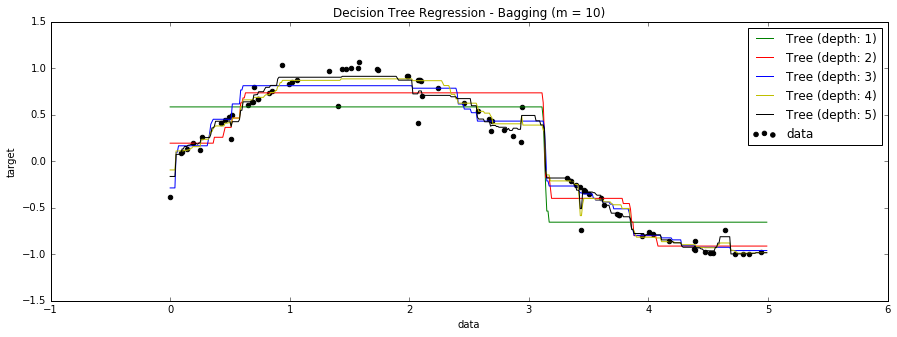

In [63]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
n = 80
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(n, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16)) # 80/5 = 16  on rajoute du bruit ici...

m = 10 # nombre de modèles par aggrégation
K = 5 # profondeur max des arbres
X_bootstrap = np.zeros((n,m))
y_bootsrap = np.zeros((n,m))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
n_test = len(X_test)
y_pred_bootstrap = np.zeros((n_test,m, K))
y_pred = np.zeros((n_test, K))

plt.close('all')
plt.figure(figsize=(15,5))
plt.scatter(X, y, c="k", label="data")
color = ['g', 'r','b','y', 'black']

for k in range(1, K+1):
    max_depth = k
    for l in range(m):

        # Create m bootstrap samples :
        indices = np.random.randint(n, size=n)
        X_bootstrap[:, l] = X[indices].ravel()
        y_bootsrap[:,l] = y[indices].ravel()

        # Fit regression model
        clf = DecisionTreeRegressor(max_depth=max_depth)
        clf.fit(X_bootstrap[:,l].reshape(n,1), y_bootsrap[:,l].reshape(n,1))

        # Predict
        y_pred_bootstrap[:,l, k-1] = clf.predict(X_test)


    # On aggrège les résultats (moyenne en régression)
    y_pred[:, k-1] = np.mean(y_pred_bootstrap[:,:,k-1], axis=1)
    plt.plot(X_test, y_pred[:, k-1], c=color[k-1], label="Tree (depth: %d)" % max_depth)

    
# Plot the results

plt.xlabel("data")
plt.ylabel("target")
plt.title('Decision Tree Regression - Bagging (m = '+str(m)+')')
plt.legend()
plt.show()

<h3>Question 10</h3>
- En augmentant m (le nombre de modèles dans chaque aggrégat), on diminue la variance de l'estimateur aggrégé, et donc on lisse de plus en plus la frontière de décision. 
Lorsque m est proche de 1, les frontières de décision ne fit pas bien les données, il y a seulement quelques 'cassures', on lisse la courbe avec m grand.


- On observe qu'en augmentant la profondeur de l'arbre, la complexité de la frontière de décision augmente (on fit d'avantage les données).



<h3>Question 11</h3>

Comme déjà mentionné, le paramètre m nous montre la réduction de variance du bagging par rapport au modèle simple (sans aggrégation).
On remarque que pour les faibles valeurs de m, la frontière de décision s'approche des valeurs abberantes (points sur lesquels on a rajouté du bruit à la sinusoïde), alors que pour les grandes valeurs de m, ce phénomène est lissé et donc on réduit le biais introduit par les arbres seuls.

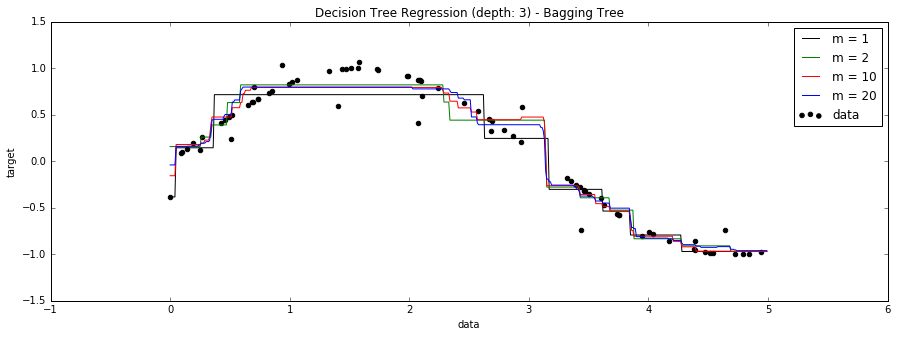

In [65]:
K = 3 # profondeur max des arbres
m_list = [1, 2, 10, 20] # les paramètre m qu'on teste

M = len(m_list)
y_pred = np.zeros((n_test, M))

max_depth = K

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
n_test = len(X_test)

plt.figure(figsize=(15,5))
plt.scatter(X, y, c="k", label="data")
color = ['g', 'r','b','y', 'black']


for i,m in enumerate(m_list):
    X_bootstrap = np.zeros((n,m))
    y_bootsrap = np.zeros((n,m))

    y_pred_bootstrap = np.zeros((n_test,m, M))

    for l in range(m):

        # Create m bootstrap samples :
        indices = np.random.randint(n, size=n)
        X_bootstrap[:, l] = X[indices].ravel()
        y_bootsrap[:,l] = y[indices].ravel()

        # Fit regression model
        clf = DecisionTreeRegressor(max_depth=max_depth)
        clf.fit(X_bootstrap[:,l].reshape(n,1), y_bootsrap[:,l].reshape(n,1))

        # Predict
        y_pred_bootstrap[:,l, i-1] = clf.predict(X_test)


    # On aggrège les résultats (moyenne en régression)
    y_pred[:, i-1] = np.mean(y_pred_bootstrap[:,:,i-1], axis=1)
    plt.plot(X_test, y_pred[:, i-1], c=color[i-1], label='m = ' + str(m))


# Plot the results

plt.xlabel("data")
plt.ylabel("target")
plt.title('Decision Tree Regression (depth: %d) - Bagging Tree' % max_depth)
plt.legend()
plt.show()

<h3>Question 12</h3>

Pour mettre en avant le sur-apprentissage, on peut augmenter en effet le niveau de bruit. On peut aussi utiliser des arbres avec une grande profondeur (donc plus grande complexité) pour overfitter les données, d'autant plus si l'on n'en aggrège pas beaucoup (m petit).

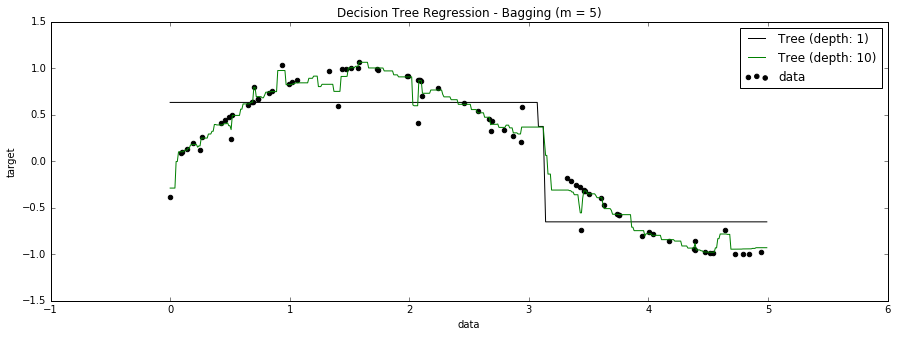

In [66]:
m = 5 # nombre de modèles par aggrégation
k_list = [1, 10] # profondeur max des arbres
K = len(k_list)
X_bootstrap = np.zeros((n,m))
y_bootsrap = np.zeros((n,m))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
n_test = len(X_test)
y_pred_bootstrap = np.zeros((n_test,m, K))
y_pred = np.zeros((n_test, K))

plt.figure(figsize=(15,5))
plt.scatter(X, y, c="k", label="data")
color = ['g', 'r','b','y', 'black']

for i, k in enumerate(k_list):
    max_depth = k
    for l in range(m):

        # Create m bootstrap samples :
        indices = np.random.randint(n, size=n)
        X_bootstrap[:, l] = X[indices].ravel()
        y_bootsrap[:,l] = y[indices].ravel()

        # Fit regression model
        clf = DecisionTreeRegressor(max_depth=max_depth)
        clf.fit(X_bootstrap[:,l].reshape(n,1), y_bootsrap[:,l].reshape(n,1))

        # Predict
        y_pred_bootstrap[:,l, i-1] = clf.predict(X_test)


    # On aggrège les résultats (moyenne en régression)
    y_pred[:, i-1] = np.mean(y_pred_bootstrap[:,:,i-1], axis=1)
    plt.plot(X_test, y_pred[:, i-1], c=color[i-1], label="Tree (depth: %d)" % max_depth)

    
# Plot the results

plt.xlabel("data")
plt.ylabel("target")
plt.title('Decision Tree Regression - Bagging (m = '+str(m)+')')
plt.legend()
plt.show()

On voit que l'arbre de grande profondeur donne un classifieur très sensible au bruit. Même en augmentant m, si le bruit augmente beaucoup aussi, on constatera ce problème.

<h3>Question 13</h3>

On peut réduire ce problème de sur-apprentissage en échantillonnant aléatoirement et sans remise (au lieu de faire prendre des échantillons bootstrap)

Remarque : le nombre $n'$ de points à tirer est un hyperparamètre à régler

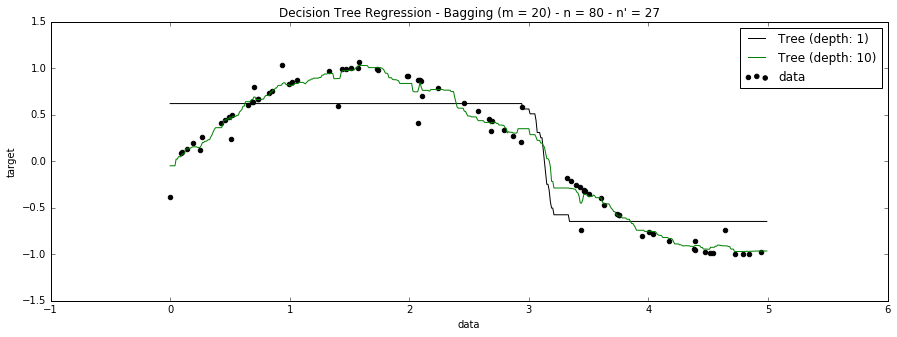

In [68]:
m = 20 # nombre de modèles par aggrégation
k_list = [1, 10] # profondeur max des arbres
K = len(k_list)

nNew = int(round(n/3))

X_bootstrap = np.zeros((nNew,m))
y_bootsrap = np.zeros((nNew,m))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
n_test = len(X_test)
y_pred_bootstrap = np.zeros((n_test,m, K))
y_pred = np.zeros((n_test, K))

plt.figure(figsize=(15,5))
plt.scatter(X, y, c="k", label="data")
color = ['g', 'r','b','y', 'black']


for i, k in enumerate(k_list):
    max_depth = k
    for l in range(m):

        # Create m samples :
        indices = np.arange(n)
        np.random.shuffle(indices)
        indices = indices[:nNew]
        X_bootstrap[:, l] = X[indices].ravel()
        y_bootsrap[:,l] = y[indices].ravel()

        # Fit regression model
        clf = DecisionTreeRegressor(max_depth=max_depth)
        clf.fit(X_bootstrap[:,l].reshape(nNew,1), y_bootsrap[:,l].reshape(nNew,1))

        # Predict
        y_pred_bootstrap[:,l, i-1] = clf.predict(X_test)


    # On aggrège les résultats (moyenne en régression)
    y_pred[:, i-1] = np.mean(y_pred_bootstrap[:,:,i-1], axis=1)
    plt.plot(X_test, y_pred[:, i-1], c=color[i-1], label="Tree (depth: %d)" % max_depth)

    
# Plot the results

plt.xlabel("data")
plt.ylabel("target")
plt.title('Decision Tree Regression - Bagging (m = '+str(m)+') - n = ' + str(n) + ' - n\' = ' + str(nNew))
plt.legend()
plt.show()

<center><h2>Forêts aléatoires</h2></center>

1


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


2


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


3


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


4


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


5


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


25


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


50


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


100


C:\Users\Francois\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in true_divide


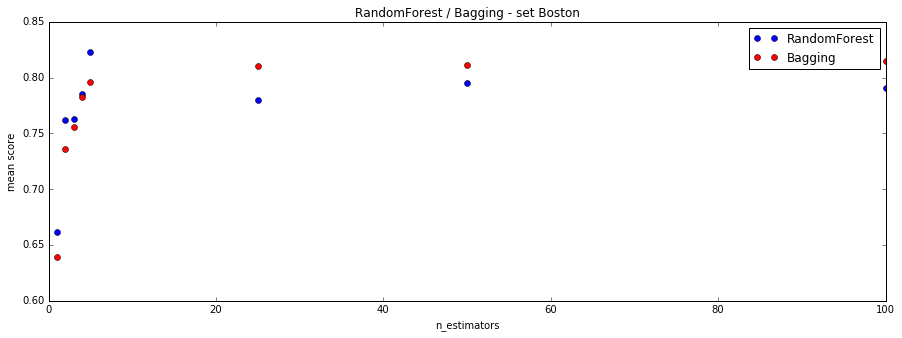

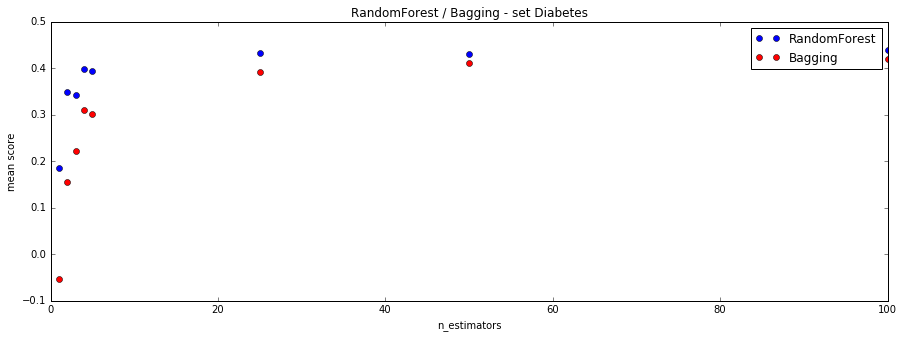

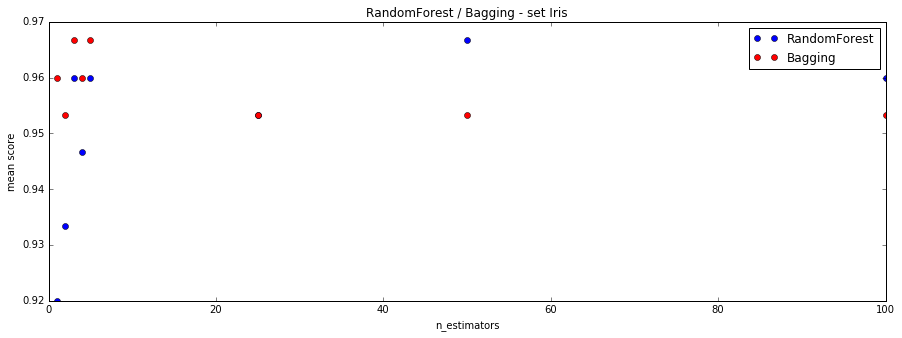

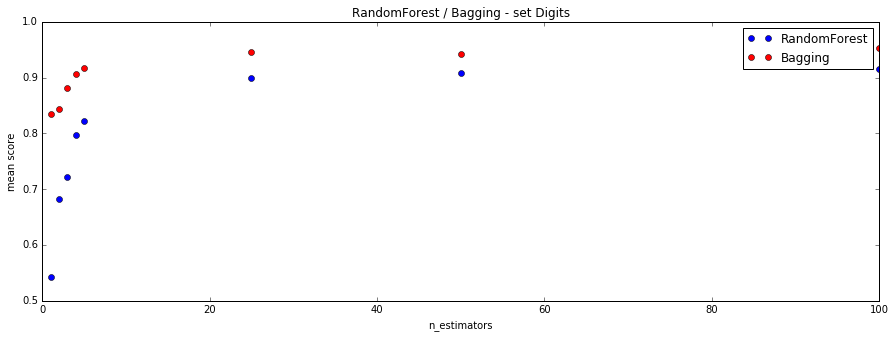

In [70]:
import pylab
from sklearn import datasets
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor)
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor)
from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor)
from sklearn.utils import shuffle
from sklearn.cross_validation import cross_val_score

# Parameters for the tree and the random forest

nEstimators_list = [1,2,3,4,5 ,25, 50, 100]
nEstimators = len(nEstimators_list) # Up to 500
max_depth = 4
min_samples_split = 1

"""
boston, diabetes (régression), 
iris et digits (classification)
"""

meanDict = {}
meanDict['Boston'] = np.zeros((nEstimators, 2))
meanDict['Diabetes'] = np.zeros((nEstimators, 2))
meanDict['Iris'] = np.zeros((nEstimators, 2))
meanDict['Digits'] = np.zeros((nEstimators, 2))

for i, n_estimators in enumerate(nEstimators_list):
    #print n_estimators
    print(n_estimators)
    
    params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}


    # For each database
    for name, dataset in (('Boston', datasets.load_boston()), 
                          ('Diabetes', datasets.load_diabetes()), 
                          ('Iris', datasets.load_iris()), 
                          ('Digits', datasets.load_digits())):

        # Shuffle data
        X, y = shuffle(dataset.data, dataset.target, random_state=0)

        # Normalize data
        mean, std = X.mean(axis=0), X.std(axis=0)
        X = (X - mean) / std

        # Get rid of Nan values
        X[np.isnan(X)] = 0.

        if (name in ['Boston', 'Diabetes']):
            #Regression

            # RandomForestRegressor
            clf = RandomForestRegressor()
            clf.set_params(**params)
            scores = cross_val_score(clf, X, y, cv=5)
            meanDict[name][i, 0] = np.mean(scores)
            #print 'RandomForestRegressor - Score set ' + name + ' : mean = ' + str(np.mean(scores)) + ', std = ' + str(np.std(scores))
            #print ('RandomForestRegressor - Score set ', name, ' : mean = ', str(np.mean(scores)), ', std = ', str(np.std(scores)))

            # BaggingRegressor
            clf = BaggingRegressor(n_estimators= n_estimators)
            scores = cross_val_score(clf, X, y, cv=5)
            meanDict[name][i, 1] = np.mean(scores)
            #print 'BaggingRegressor - Score set ' + name + ' : mean = ' + str(np.mean(scores)) + ', std = ' + str(np.std(scores))
            #print ('BaggingRegressor - Score set ', name, ' : mean = ', str(np.mean(scores)), ', std = ', str(np.std(scores)))

                
        else:
            #Classification

            # RandomForestClassifier
            clf = RandomForestClassifier()
            clf.set_params(**params)
            scores = cross_val_score(clf, X, y, cv=5)
            meanDict[name][i, 0] = np.mean(scores)
            #print 'RandomForestClassifier - Score set ' + name + ' : mean = ' + str(np.mean(scores)) + ', std = ' + str(np.std(scores))
            #print ('RandomForestClassifier - Score set ', name, ' : mean = ', str(np.mean(scores)), ', std = ', str(np.std(scores)))

            # BaggingClassifier
            clf = BaggingClassifier(n_estimators= n_estimators)
            scores = cross_val_score(clf, X, y, cv=5)
            meanDict[name][i, 1] = np.mean(scores)
            #print 'BaggingClassifier - Score set ' + name + ' : mean = ' + str(np.mean(scores)) + ', std = ' + str(np.std(scores))
            #print ('BaggingClassifier - Score set ', name, ' : mean = ', str(np.mean(scores)), ', std = ', str(np.std(scores)))


for name in ['Boston', 'Diabetes', 'Iris', 'Digits']:
    plt.figure(figsize=(15, 5))
    plt.plot(nEstimators_list, meanDict[name][:,0], 'bo', label='RandomForest')
    plt.plot(nEstimators_list, meanDict[name][:,1], 'ro', label='Bagging')
    plt.title("RandomForest / Bagging - set " + name)
    plt.xlabel("n_estimators")
    plt.ylabel("mean score")
    plt.legend()
    plt.show()

Le RandomForest, en plus d'aggréger uniformément plusieurs arbres comme fait le Bagging (qui par défaut utilise des arbres de décision pour le modèle de base), ne considère lors de la création des arbres de décison qu'un certain sous ensemble aléatoire de features à chaque noeud (perturbation volontaire...).
(Par défaut dans sklearn, ces méthodes utilisent des échantillons bootstrap)

Quand le nombre d'estimateurs augmente, les résulats (moyenne des 5 scores) augmentent globalement.
Pour certain jeu de données, la méthode Bagging semble plus performante (Boston et Digits) que RandomForest.
Il faut dire aussi que l'idée des RandomForest de considérer qu'un certain sous ensemble des features aléatoirement à chaque noeud peut ne pas considérer la feature qui était la plus pertinente à ce noeud là... Mais globalement (grâce à l'aggrégation) ça reste tout de même intéressant.

<h3>Question 15</h3>

In [71]:
# Parameters
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

# Shuffle
X, y = shuffle(X, y, random_state=42)

# Normalize
mean, std = X.mean(axis=0), X.std(axis=0)
X = (X - mean) / std

n_estimators  1  :


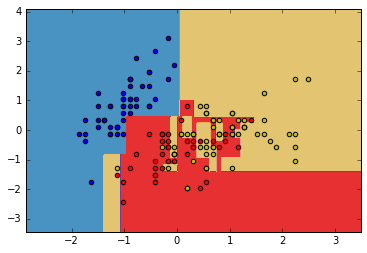

classif_rate : 87.333333 


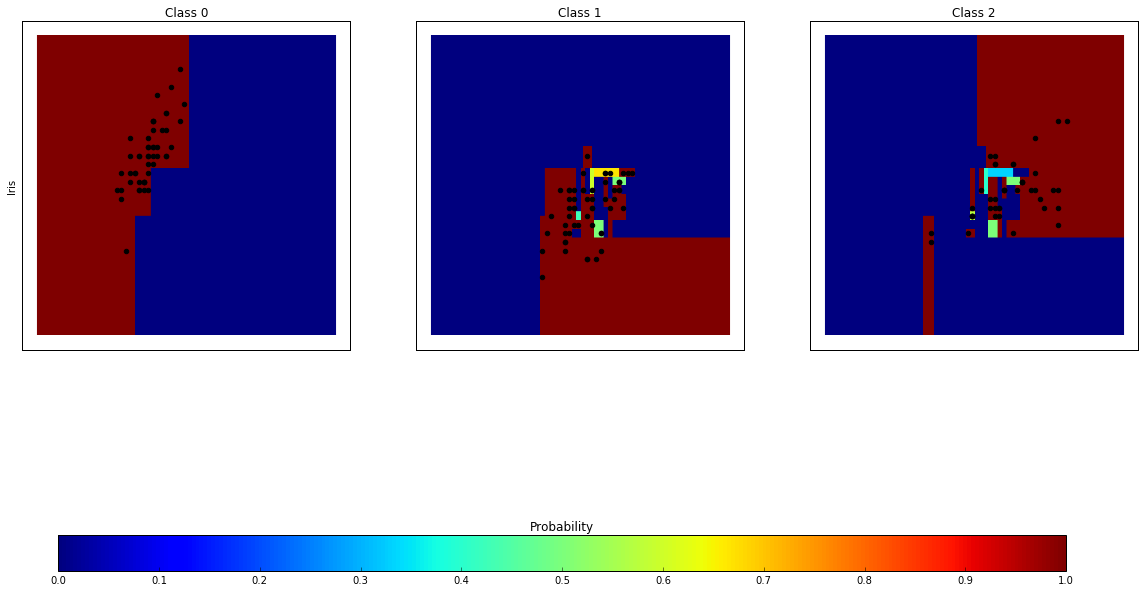

 
n_estimators  10  :


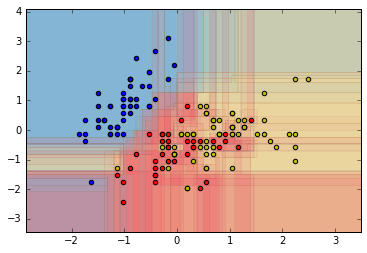

classif_rate : 91.333333 


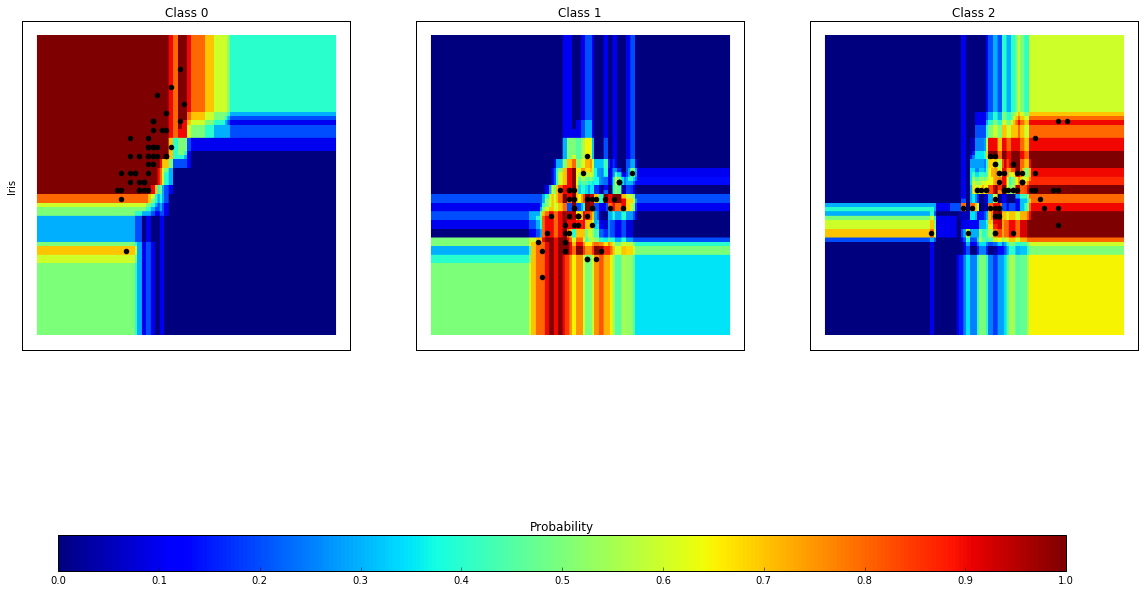

 
n_estimators  25  :


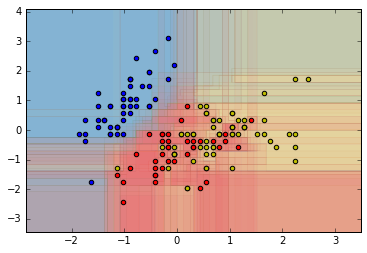

classif_rate : 91.333333 


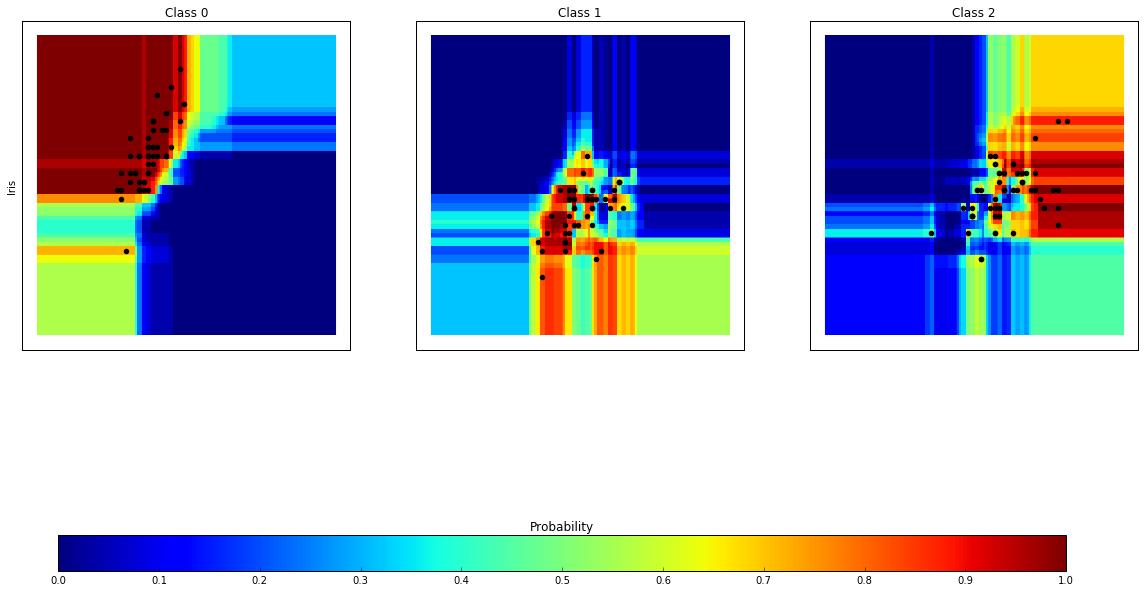

 
n_estimators  100  :


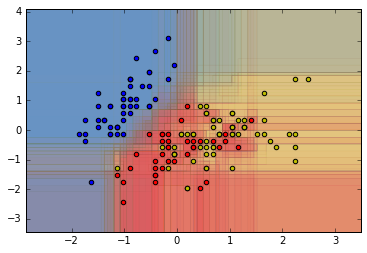

classif_rate : 92.666667 


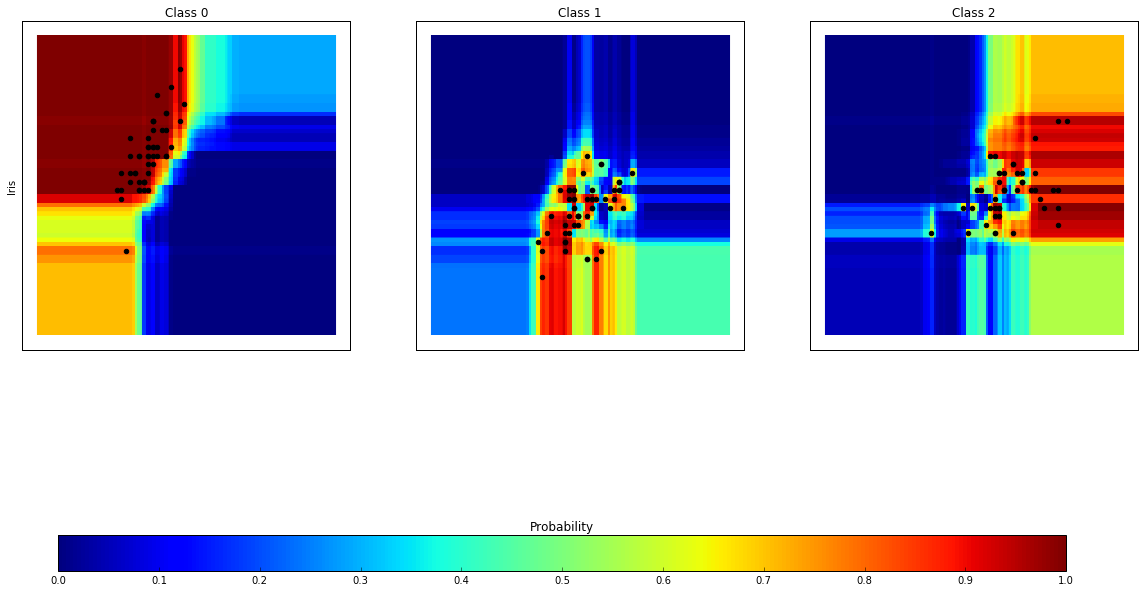

In [73]:
# Train the model
for n_estimators in [1, 10, 25, 100]:
    #print 'n_estimators ' + str(n_estimators) + ' :'
    print('n_estimators ', str(n_estimators), ' :')
    model = RandomForestClassifier(n_estimators=n_estimators)
    clf = model.fit(X, y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)

    plt.axis("tight")

    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=plt.cm.Paired)

    plt.show()


    ### On se sert du script  plot_classification_probability.py
    # écrit par Alexandre Gramfort <alexandre.gramfort@inria.fr>
    # License: BSD 3 clause

    plt.figure(figsize=(20,10))
    plt.subplots_adjust(bottom=.2, top=.95)

    y_pred = model.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate : %f " % (classif_rate))

    # View probabilities
    xx = np.linspace(-4, 4, 1000)
    yy = np.linspace(-4, 4, 1000).T
    xx, yy = np.meshgrid(xx, yy)
    Xfull = np.c_[xx.ravel(), yy.ravel()]
    probas = model.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(1, n_classes, k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel('Iris')
        imshow_handle = plt.imshow(probas[:, k].reshape((1000, 1000)),
                                   extent=(-4, 4, -4, 4), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

    ax = plt.axes([0.15, 0.04, 0.7, 0.05])
    plt.title("Probability")
    plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

    plt.show()
    print(' ')

Les régions à faibles probabilités de prédiction sont les régions proches (de part et d'autre) des frontières de décision.

<h3>Question 16</h3>

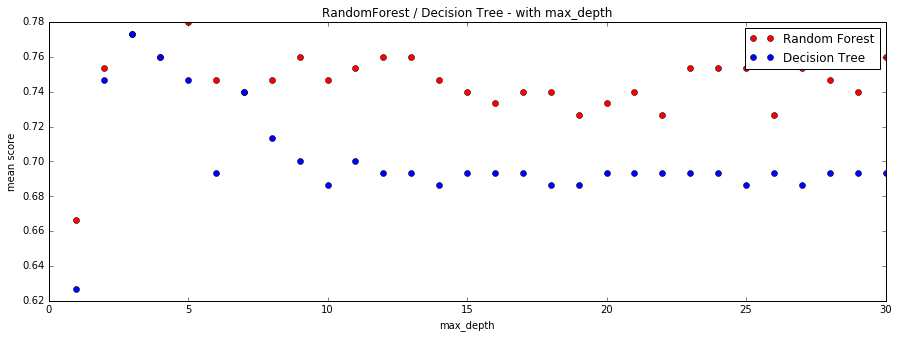

In [74]:
maxDepth = 30
n_estimators = 50

# Load the data
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

# Shuffle
X, y = shuffle(X, y, random_state=42)

# Normalize
mean, std = X.mean(axis=0), X.std(axis=0)
X = (X - mean) / std

scores = np.zeros((maxDepth, 2))

for k in range(1, maxDepth+1):
    # Random Forest
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=k)
    scores[k-1,0] = np.mean(cross_val_score(clf, X, y, cv=5))
    
    # Single Decision Tree
    clf = DecisionTreeClassifier(max_depth=k)
    scores[k-1,1] = np.mean(cross_val_score(clf, X, y, cv=5))

plt.figure(figsize=(15,5))
plt.plot(range(1,maxDepth+1), scores[:,0], 'ro', label='Random Forest')
plt.plot(range(1,maxDepth+1), scores[:,1], 'bo', label='Decision Tree')
plt.title("RandomForest / Decision Tree - with max_depth")
plt.xlabel("max_depth")
plt.ylabel("mean score")
plt.legend()
plt.show()

On remarque que même si la complexité de l'arbre augmente (avec max_depth), on peut réduire le sur apprentissage avec les RandomForest (étant donné que le score est plus haut globalement avec ce modèle qu'avec un seul arbre).